# 1. Summary

#### Aim: 
- To explore and understand the household income of the Philippines. Particularly, we are interested in analysing if the household income of two most populated regions are the same or not.

#### Data:
- A sample data set with 41544 observations and 60 features/variables was used for the study.
- We found missing data in three variables, however it didn't affect the scope of the study.
- The household income data had outliers, with few households earning higher income.

#### Method:

- ANOVA test was conducted to test if the mean household income of Calabarzon and NCR are the same or different.

#### Results and findings:

- We had strong evidence to suggest that the two regions' household income were different. Households in NCR earn higher income compared to Calabarzon region.
- With 95% confidence, the expected household income of Calabarzon region is between ~280K and ~310K Peso, and NCR region is between ~411K and ~464K Peso.

# 2. Technical notes

### Exploratory data analysis

In [1]:
!python --version

# import libraries

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

from summarytools import dfSummary

import matplotlib.pyplot as plt
import seaborn as sb

import random

import scipy
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


Python 3.11.2


##### Read in the data 

In [2]:
data = pd.read_csv('\DATA\Family_Income_and_Expenditure.csv')

##### Inspect the data

In [3]:
# view top 5 rows
data.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
# view bottom 5 rows
data.tail(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# shape
data.shape

(41544, 60)

In [6]:
# information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [7]:
# missing values
data.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [8]:
# missing values
data.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

Comments:
- There are missing data in Household Head Occupation, Household Head Class of Worker, Toilet Facilities.
- Better to investigate if they are missing at random.

#### What to do when the data set is large, but the question of interest is limited and straightforward...

In [9]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Total Household Income[int64],Mean (sd) : 247555.6 (286880.5)min < med < max:11285.0 < 164079.5 < 11815988.0IQR (CV) : 186243.5 (0.9),"38,670 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABk0lEQVR4nO3XwWoaUQCF4XtrKnHRGURw6SP0AXyIPGy23fssbqSOlGojcrPLJqTGSUt74PvWcw8X5mfE2lor8L/79K8vAO9xd+2BWuuslDIduf/UWjuOPAsvfhtqrXW2WCweuq6bjxk/HA7fa62PYuWjrn1Rp13Xzdfr9bHv+9Mtw8Mw3G82m/lut5uWUoTKh1z96S+llL7vT8vl8ueI/dmIM/CKP1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoR7v7m+OVy+VxK6WqtYyeeWmvHP3glQr0r1GEY7m8d3m63X87n89fVajWZTCan269Wyn6//1Fr/VZKGXWeKL9aa2++52fxYDzEnB/1ZAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Region[object],1. IVA - CALABARZON2. NCR3. III - Central Luzon4. VI - Western Visayas5. VII - Central Visayas6. V - Bicol Region7. XI - Davao Region8. I - Ilocos Region9. VIII - Eastern Visayas10. ARMM11. other,"4,162 (10.0%)4,130 (9.9%)3,237 (7.8%)2,851 (6.9%)2,541 (6.1%)2,472 (6.0%)2,446 (5.9%)2,348 (5.7%)2,337 (5.6%)2,248 (5.4%)12,772 (30.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD90lEQVR4nO3dPWobbQBG0VdBhKSRMAYvxovIYrMI7cYYq/gS0ihFemv+uJ9kn9NLTHF5zQzzWLvL5TKg8OX/vgA+D7GRERsZsZERGxmxkREbGbGRERuZ3Rjj+xjj64rv+HO5XH5tdD18YPvHx8cfh8PhYekXnM/n191u91NwXLM/HA4Pz8/Pv47H4++5H357e/t2Op0eXl5evo4xxMa79mOMcTwefz89Pf238Du+b3g9fGBuEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcx+jH/vpS358NLP8Tntz+fz6+l0ehgL30s7n8+vY4w/214WH5ENApmdf5lFZe3J5lRjslXrKssq5li8rrKsYq616yrLKibzUJeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M4sGLsQtzrRq8GLswh9fCyRi8kFlysjnNWGT24MXIhaVmDV6MXFhjyeDFyIVFPNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjM2vwYuTCGrMHL0YuLOW1cDIGL2TcIJCZ+2fUn1AWm7WusqxijcnrKssq1pq7rrKsYjE3CGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQmr6ssq1hr1rrKsoo1vBZOxrqKzNSTzYnGapMGL4YubOHq4MXQha1MHbwYurCah7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrg5eDF3YyqTBi6ELW/BaOBmDFzJONjIGL2QMXsgYvJDxUJeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriJjg0DGuoqMk42MdRUZ6yoy1lVkPNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjNfCyRi8kHGykTF4IWPwQsbghYyHumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJDxWjgZgxcybhDI+DNKxrqKjHUVGesqMm4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuO1cDLWVWSmnGxONTZxdfBi7MJW3h28GLuwpSmDF2MXNuGhLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5l3By/GLmzp6uDF2IWteC2cjMELmalTvlvm5L0Tk37h5ZYZ5NyPq7/wcssMcu7L1F94uWUGOXfCQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyV3/h5Zbd63V/VpN+4eWWGeTcD6+FkzF4IeMGgYzYyIiNjNjIiI2M2MiIjYzYyIiNzF+w8k7iPysEwwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Total Food Expenditure[int64],Mean (sd) : 85099.2 (51637.9)min < med < max:2947.0 < 72985.5 < 827565.0IQR (CV) : 54618.2 (1.6),"35,776 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB90lEQVR4nO3cwWrCQBhF4X8alag0QQTd+QhduPQh+rDddu+ziCA1klQbkemmlkJpNRNsc8P51s4gcohkc5333oCmu/vvLwBco3PpA865vpn1Au8vvff7wLPAp19Ddc71x+PxY5Iko5DLd7vdi3PuiVhR16Unai9JktFisdinaXqocnGWZfFyuRxtNpuemREqarn4129mlqbpYTKZvAbc3w84A3zDyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokXDWSFup0OnXNLHHOhV7BvirM7IahFkXRPR6PD7PZLIqiqNJk5Rn7qji7WahlWXbiOB7M5/PDdDp9qXqefVV8ddO/fjOz4XAYuq1qxr4qPvAyBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgk3X0qpo+bIGgNrLdLYUOuOrDGw1i6NDbXOyBoDa+3T2FDPaoysMbDWIrxMQULjn6ihWLtul6tCzbIsrnpxnuexmVlRFPF6vR785fnVanVfd+16u93mzrlnMws6j8revPc//tbvxzif8iu

#### Distribution of household income

Text(0.5, 0, 'Currency: Peso')

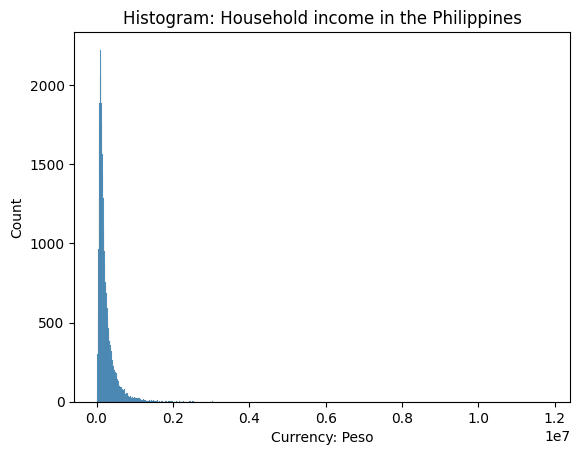

In [10]:
sb.histplot(data['Total Household Income'])
plt.title('Histogram: Household income in the Philippines')
plt.xlabel('Currency: Peso')

Text(0.5, 0, 'Currency: Peso')

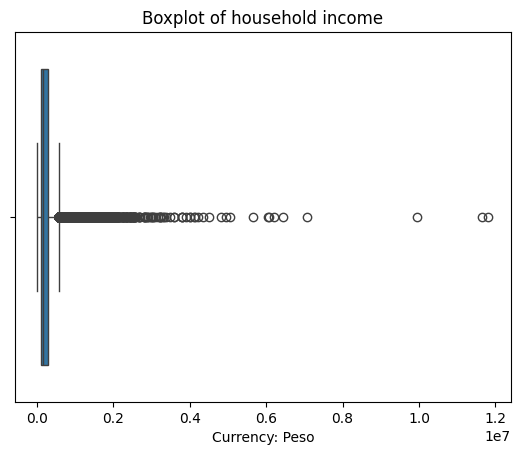

In [11]:
sb.boxplot(data['Total Household Income'], orient='h')
plt.title('Boxplot of household income')
plt.xlabel('Currency: Peso')

##### Descriptive stats of household income

In [12]:
data['Total Household Income'].describe().apply(lambda x: format(x, 'f'))

count       41544.000000
mean       247555.584802
std        286880.522653
min         11285.000000
25%        104895.000000
50%        164079.500000
75%        291138.500000
max      11815988.000000
Name: Total Household Income, dtype: object

Comments:
- The above plot shows strong right-skewness,
- There appears to be outliers with very high household income,
- There is a huge difference between mean and median household income, hence the standard deviation is high,
- Look at the minimum (11K Peson) and maximum household income (~12Mn Peso), it's a big difference.

Text(0.5, 0, 'Currency: Peso')

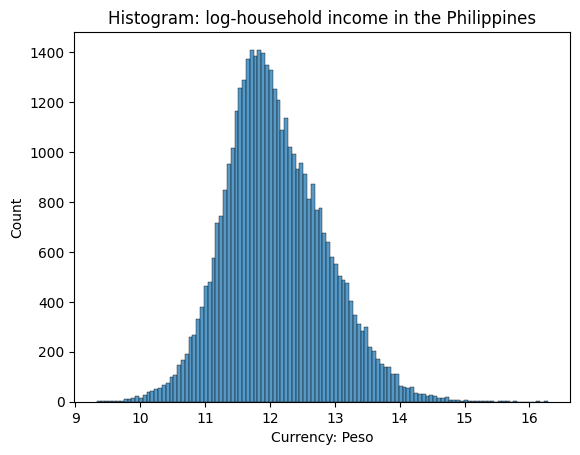

In [13]:
sb.histplot(np.log(data['Total Household Income']))
plt.title('Histogram: log-household income in the Philippines')
plt.xlabel('Currency: Peso')

Comments:
- The log-transformed household income looks better, and show normal distribution

#### Categorical data

Text(0.5, 1.0, 'Sample data: Distribution of regions in the Philippines')

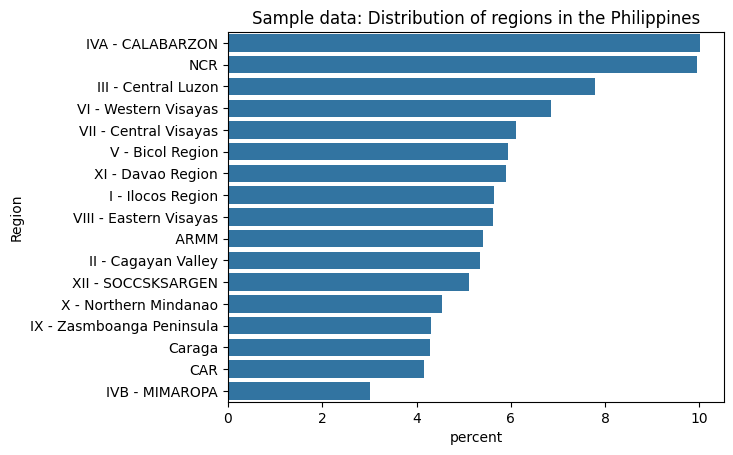

In [14]:
plt = sb.countplot(y = 'Region',
            data = data, 
            orient = 'h',
            stat = 'percent',
            order = data['Region'].value_counts().index)
plt.set_title('Sample data: Distribution of regions in the Philippines')
#plt.set_xticklabels(plt.get_xticklabels(), rotation=45)

Comments:
- There appears to be data imbalance.
- Can we assume that the sample data are representative of the population?
    - Assuming stratified sampling technique was used to collect sample household data from each region in the Philippines

Facts about the population:
- Calabarzon: 16.1Mn
- NCR: 13.4Mn

Source: https://psa.gov.ph/statistics/population-and-housing/node/164786

#### What does the distribution of household income look for the two most populated regions?

Get the data for Calabarzon and NCR regions

In [15]:
cal_ncr_data = data[(data['Region'] == 'IVA - CALABARZON') | (data['Region'] == 'NCR')]
cal_ncr_data.sample(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
40127,197890,NCR,122388,Wage/Salaries,2,26514,24592,9791,7973,680,...,1,0,0,0,0,2,0,0,0,1
17521,181795,IVA - CALABARZON,68495,Other sources of Income,0,17813,13394,11291,9076,2914,...,1,0,0,0,0,0,0,0,0,0
37828,441420,NCR,164187,Wage/Salaries,2,28268,17900,10460,6715,4700,...,0,1,0,0,0,4,0,1,0,0
38542,494550,NCR,94282,Other sources of Income,2,17189,5590,8867,12286,2851,...,1,1,0,0,0,1,0,0,0,0
16708,235019,IVA - CALABARZON,81012,Wage/Salaries,0,14274,11960,8430,9752,2370,...,1,1,0,0,0,3,0,0,0,1


Visualise the income for two regions

<Axes: xlabel='Region', ylabel='Total Household Income'>

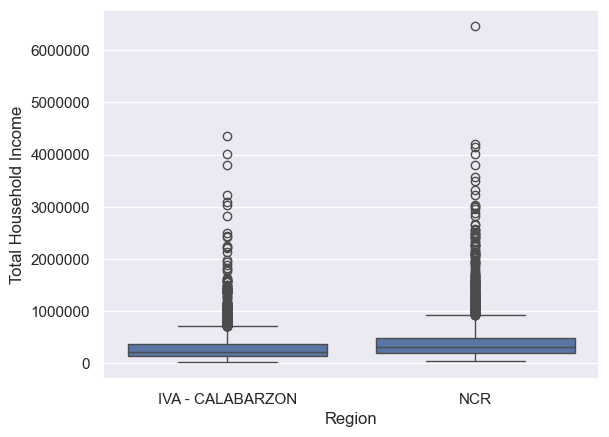

In [16]:
sb.set_theme(rc={'axes.formatter.limits': (-8, 9)})
sb.boxplot(y = 'Total Household Income',
           x = 'Region',
           data = cal_ncr_data)

Comments:

- The distribution of income for both regions is right-skewed.
- Both regions show some outliers that have very high household income.

#### Conduct ANOVA test to check if the mean income of regions are different

Obtain sample of 1000 data for each region

In [17]:

random.seed(12345)

cal_samples = cal_ncr_data[cal_ncr_data['Region'] == 'IVA - CALABARZON'].sample(n=1000, replace = False)
ncr_samples = cal_ncr_data[cal_ncr_data['Region'] == 'NCR'].sample(n=1000, replace = False)

cal_ncr_samples = pd.concat([cal_samples, ncr_samples])
cal_ncr_samples = cal_ncr_samples.rename(columns={'Total Household Income': 'Income'})

Conduct ANOVA test

In [18]:
random.seed(12345)

aovFit1 = ols('Income ~ Region', data = cal_ncr_samples).fit()
                
aovTable1 = sm.stats.anova_lm(aovFit1, typ=2)
print(aovTable1)

                sum_sq      df          F        PR(>F)
Region    1.008102e+13     1.0  83.740422  1.352192e-19
Residual  2.405275e+14  1998.0        NaN           NaN


Comments:
- From the above model summary, we have strong evidence to suggest that the mean income of Calabarzon and NCR regions aren't the same.

Construct confidence interval of income for two regions

In [19]:
random.seed(12345)

# calculate mean and std err

# Calabarzon
cal_mean_income = np.mean(cal_ncr_samples[cal_ncr_samples['Region']=='IVA - CALABARZON'].Income)
cal_sem = st.sem(cal_ncr_samples[cal_ncr_samples['Region']=='IVA - CALABARZON'].Income)

# NCR
ncr_mean_income = np.mean(cal_ncr_samples[cal_ncr_samples['Region']=='NCR'].Income)
ncr_sem = st.sem(cal_ncr_samples[cal_ncr_samples['Region']=='NCR'].Income)


In [20]:
# we have more than 30 samples, so use Normal distribution
import scipy.stats


random.seed(12345)
cal = scipy.stats.norm(cal_mean_income, cal_sem) 

# To calculate the interval, you need to provide a confidence level, for example 95%
confidence = 0.95
cal_interval = cal.interval(confidence)
print("Calabarzon: ", cal_interval)

random.seed(12345)
ncr = scipy.stats.norm(ncr_mean_income, ncr_sem) 
ncr_interval = ncr.interval(confidence)
print("NCR: ", ncr_interval)


Calabarzon:  (280996.1469643639, 310702.249035636)
NCR:  (411303.8608730115, 464380.7251269885)


Comments: 

- With 95% confidence, the expected household income of Calabarzon region is between ~280K and ~310K Peso.

- With 95% confidence, the expected household income of NCR region is between ~411K and ~464K Peso.

#### Let's look at main sources of income in these two regions....

In [50]:
import plotly.express as px

fig = px.bar(cal_ncr_data, x='Region', y='Total Household Income', 
             color='Main Source of Income', 
             color_discrete_sequence=['green', 'red', 'blue'],
             title='Regions and sources of income')
fig.show()

##### Even better, let's look at the table of counts and proportions...

In [51]:
table_of_counts = pd.crosstab(cal_ncr_data['Region'], cal_ncr_data['Main Source of Income'])
table_of_counts / table_of_counts.sum().sum() * 100

Main Source of Income,Enterpreneurial Activities,Other sources of Income,Wage/Salaries
Region,,,
IVA - CALABARZON,8.140376,12.313073,29.739508
NCR,6.234925,9.611674,33.960444


References:

Automated EDA: https://www.nb-data.com/p/python-packages-for-automated-eda

The Philippines population data: https://psa.gov.ph/statistics/population-and-housing/node/164786